# Dependencies 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Plotting parameters

In [8]:
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [15, 8]

# Overview
In this note, we will load in raw DAPHNE data and apply some essential preprocessing to the PM 2.5 values and GPS coordinates.

In [4]:
daphne_raw_path = '../TF/data/DAPHNE/all_raw' # Replace with your path to DAPHNE data 
df = pd.read_csv(daphne_raw_path, parse_dates=['timestamp']).sort_values('timestamp')
df.describe() 

,gpsLatitude,gpsLongitude,pm2_5
count,7.579500e+05,7.579500e+05,7.579500e+05
mean,-1.080806e+08,-3.621447e+32,1.289586e+29
std,4.030215e+10,1.717746e+35,1.038090e+32
min,-1.424964e+13,-8.607011e+37,-1.773310e+01
25%,2.849475e+01,7.717160e+01,5.625525e+01
50%,2.857005e+01,7.727605e+01,9.420605e+01
75%,2.869510e+01,7.730466e+01,1.756996e+02
max,3.578187e+12,1.345373e+36,9.004815e+34


# Outlier removal 
The means of each column are orders of magnitude different from what we would expect - clearly the raw DAPHNE data has plenty of outliers, which we need to remove. 

### Outliers: GPS latitude  
The GPS latitude of New Delhi is $\approx28.6448$. 1 degree of latitude equates to around 111 kilometers. Considering the graph of latitude, and estimating the size of New Delhi, I chose to keep latitude values in the range $28.6448 \pm 0.4000$. <br>
I have not done any more preprocessing of GPS latitude; however, one might considering smoothing and interpolation as next steps.

In [5]:
def mask_in_range(srs, vmin, vmax):
    """
    Useful for graphing values in range vs out of range 
    """
    return (vmin <= srs) & (srs <= vmax)


def set_out_of_range(df, col, vmin, vmax, inplace=True, set_val=pd.NA):
    """
    Convenience function for masking out values not in range. 
    """
    return df[col].where(mask_in_range(srs=df[col], vmin=vmin, vmax=vmax), set_val, inplace=inplace)

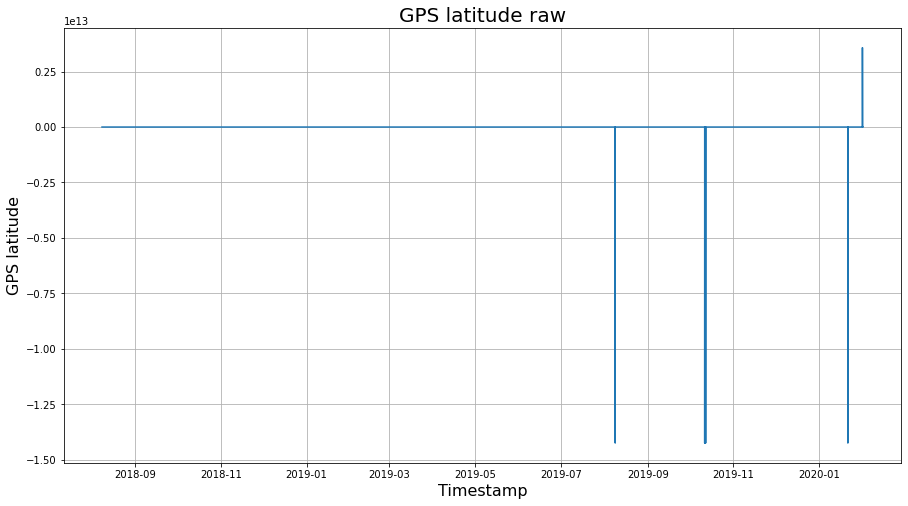

In [9]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['gpsLatitude'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('GPS latitude')
ax.set_title('GPS latitude raw');

In [10]:
NEW_DELHI_LAT = 28.6448
DELTA_LAT = 0.4
set_out_of_range(
    df=df, 
    col='gpsLatitude',
    vmin=NEW_DELHI_LAT-DELTA_LAT, 
    vmax=NEW_DELHI_LAT+DELTA_LAT,
)

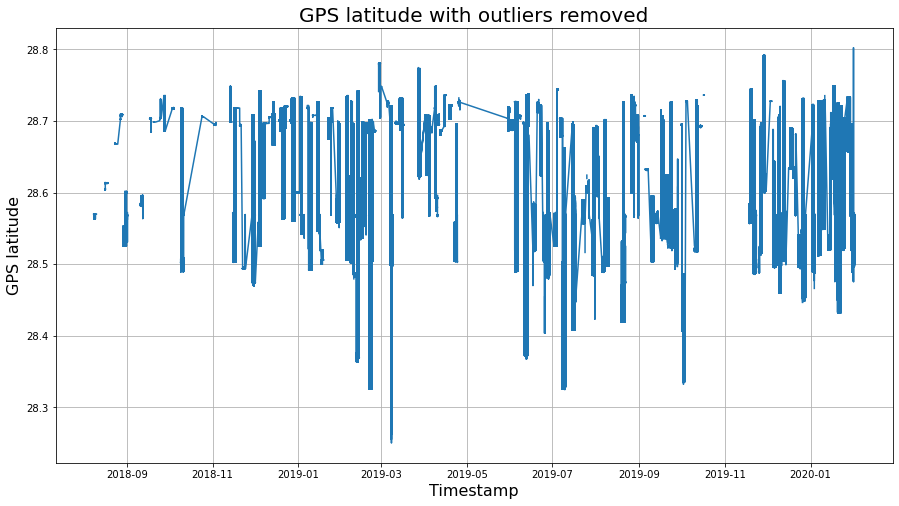

In [11]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['gpsLatitude'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('GPS latitude')
ax.set_title('GPS latitude with outliers removed');

### Outliers: GPS longitude  
The GPS latitude of New Delhi is $\approx77.2167$. 1 degree of longitude at New Delhi's latitude equates to around 100 kilometers. Considering the graph of longitude, and estimating the size of New Delhi, I chose to keep latitude values in the range $77.2167 \pm 0.5000$. <br>
I have not done any more preprocessing of GPS longitude; however, again, one might considering smoothing and interpolation as next steps.

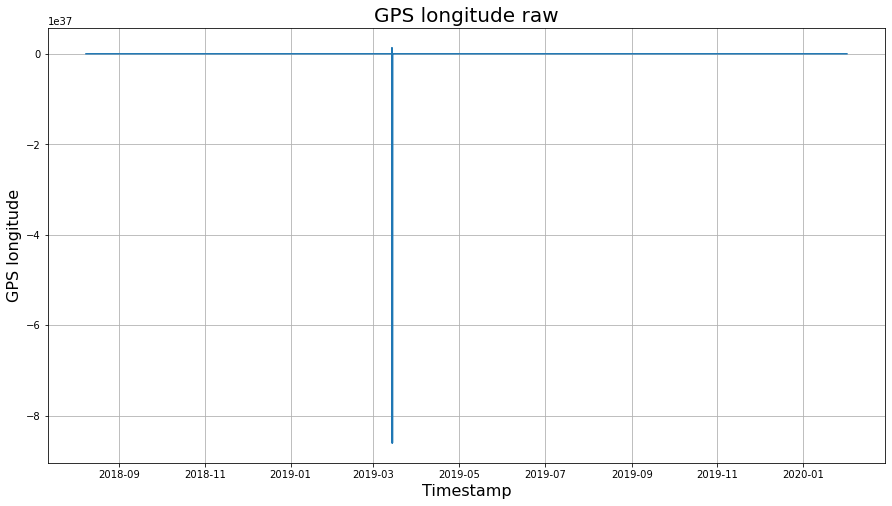

In [12]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['gpsLongitude'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('GPS longitude')
ax.set_title('GPS longitude raw');

In [13]:
NEW_DELHI_LON = 77.2167
DELTA_LON = 0.5
set_out_of_range(
    df=df, 
    col='gpsLongitude',
    vmin=NEW_DELHI_LON-DELTA_LON, 
    vmax=NEW_DELHI_LON+DELTA_LON,
)

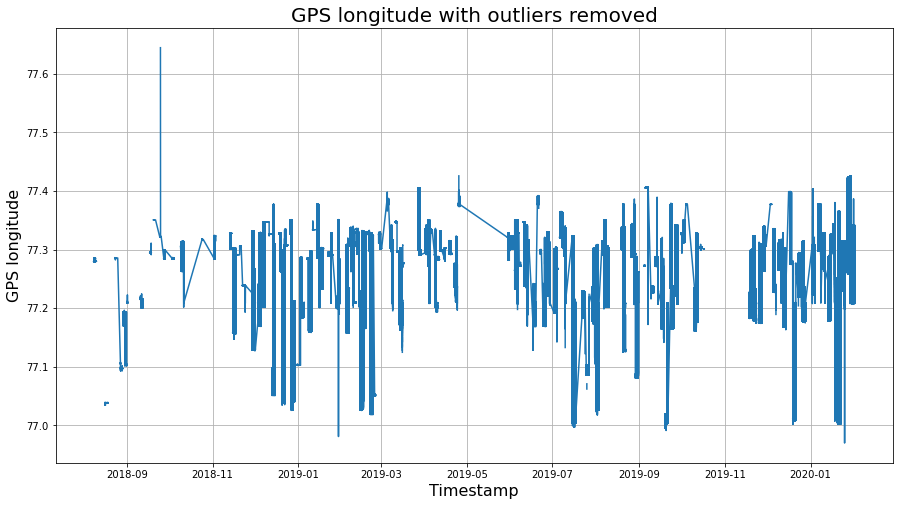

In [14]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['gpsLongitude'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('GPS longitude')
ax.set_title('GPS longitude with outliers removed');

### Outliers: PM 2.5 
I decided to remove PM 2.5 outliers based on some domain knowledge and on the assumption that capturing large, but short-lived, spikes in pollution might hinder pollution forecasting rather than helping it. Thus, I set the lower limit for PM 2.5 to 0 and the upper limit to 1000 - this is still a reasonably common value in New Delhi; this is also roughly the value at which increases in standard deviation do not effect a significant difference in the PM 2.5 - meaning that any values above are likely short-lived spikes (whether real or erroneous). <br>

As previously, I have not done more preprocessing steps. Smoothing and interpolation might be desirable.

In [15]:
def plot_mean_and_std_vs_ceiling(srs, ceiling_range):
    srs = srs[srs >= 0]
    mean, std, x = [], [], []
    for ceiling in ceiling_range:
        srs_cut = srs[srs <= ceiling]
        mean.append(srs_cut.mean())
        std.append(srs_cut.std())
        x.append(ceiling)
    
    fig, ax = plt.subplots()
    ax.plot(x, mean, label='mean')
    ax.plot(x, std, label='std')
    
    # Chosen cutoff
    ax.vlines([1000], 0, 1, transform=ax.get_xaxis_transform(), colors='r', label='cutoff')
    
    ax.legend()
    ax.set_title("Mean and standard deviation of PM 2.5 for different ceiling cutoffs")
    ax.set_xlabel("Ceiling cutoff")    
    plt.xticks(rotation=60)
    plt.tight_layout()
    
    return fig, ax

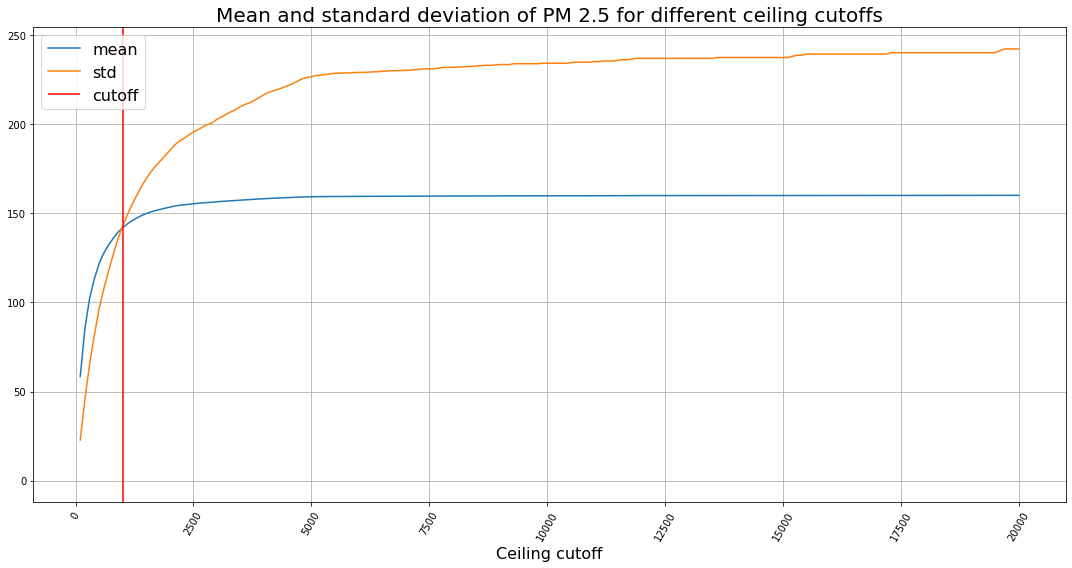

In [16]:
plot_mean_and_std_vs_ceiling(df['pm2_5'], range(0, 20001, 100));

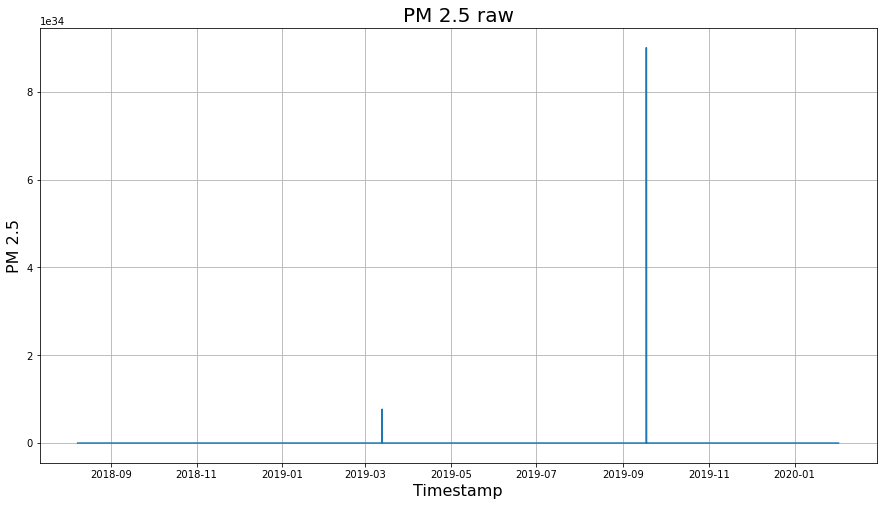

In [17]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['pm2_5'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('PM 2.5')
ax.set_title('PM 2.5 raw');

In [18]:
PM2_5_MIN, PM2_5_MAX = 0, 1000 
set_out_of_range(
    df=df, 
    col='pm2_5',
    vmin=PM2_5_MIN, 
    vmax=PM2_5_MAX,
)

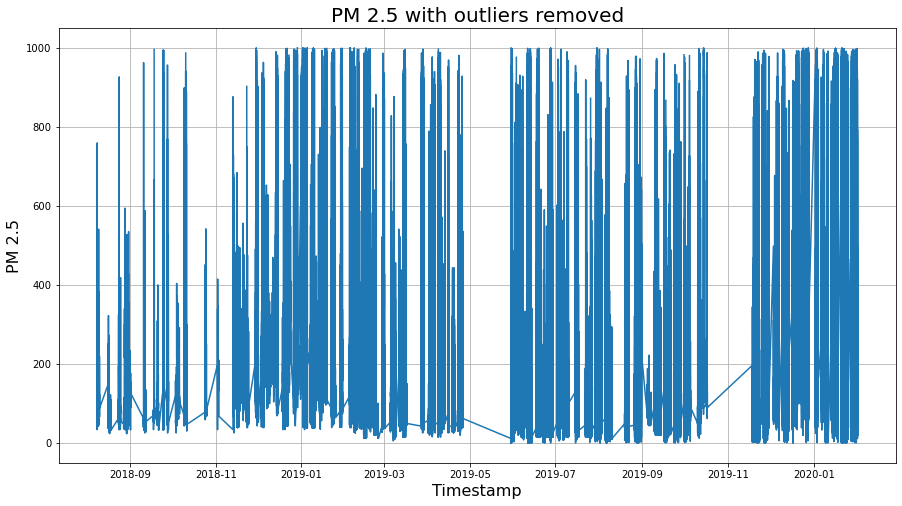

In [19]:
fig, ax = plt.subplots()
x, y = df['timestamp'].values, df['pm2_5'].values
ax.plot(x, y)
ax.set_xlabel('Timestamp')
ax.set_ylabel('PM 2.5')
ax.set_title('PM 2.5 with outliers removed');

# Preprocessing pipeline 
The following might be useful for performing grid-search over preprocessing parameters. 

In [20]:
def preprocess_latitude(df, mid=28.6448, dnorth=0.4, dsouth=0.4, inplace=True):
    return set_out_of_range(
        df=df, 
        col='gpsLatitude',
        vmin=mid-dsouth, 
        vmax=mid+dnorth, 
        inplace=inplace,
    )

def preprocess_longitude(df, mid=77.2167, deast=0.5, dwest=0.5, inplace=True):
    return set_out_of_range(
        df=df, 
        col='gpsLongitude',
        vmin=mid-dwest, 
        vmax=mid+deast, 
        inplace=inplace,
    )

def preprocess_pm2_5(df, vmin=0, vmax=1000, inplace=True):
    return set_out_of_range(
        df=df, 
        col='pm2_5',
        vmin=vmin, 
        vmax=vmax, 
        inplace=inplace,
    )

def preprocess(df, inplace=False):
    """
    Convenience function for one-shot preprocessing of DAPHNE.
    """
    if inplace is False: 
        df = df.copy()
    preprocess_latitude(df)
    preprocess_longitude(df)
    preprocess_pm2_5(df)
    if inplace is False: 
        return df 

# Example

In [21]:
preprocess(df).set_index('timestamp')

,gpsLatitude,gpsLongitude,pm2_5
timestamp,,,
2018-08-08 05:00:00,28.569899,77.280083,105.799411
2018-08-08 05:01:00,28.569924,77.280082,106.032747
2018-08-08 05:02:00,28.569925,77.280082,104.961243
2018-08-08 05:03:00,28.569923,77.280083,102.461466
2018-08-08 05:04:00,28.569871,77.280125,103.492459
...,...,...,...
2020-02-01 06:56:00,28.568823,77.209016,178.021092
2020-02-01 06:57:00,28.568824,77.209043,235.330426
2020-02-01 06:58:00,28.568807,77.208993,265.353885
